# **Graduate Rotational Internship Program(GRIP) @ The Sparks Foundation**

# **Data Science and Business Analytics Intern**

# **Task 1:- Prediction Using Supervised Machine Learning (ML)**

## **Author:- Gowtham Vinayagamurthy**

### **Aim**
- To predict the percentage of a student based on the number of study hours using simple linear regression.
- To find the predicted score if a student studies for 9.25 hrs/day.

### **Programing Language:- Python**

### **Intergrated Development Environment (IDE):- Jupyter Notebook**

### **Dataset:- http://bit.ly/w-data**

### **Simple Line Regression with Python Scikit Learn**<br>
In this regression task, the goal is to predict a student's expected percentage of marks based on the number of hours they studied. This task involves simple linear regression. As it includes only two variables, The Python Scikit-Learn library for machine learning will be used to implement the regression functions<br>

In [3]:
# Importing all libraries required for this task in this notebook
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [5]:
# Loading data from the Dataset
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head()
s_data.shape 
s_data.info() 
s_data.describe()
s_data.head(10)

Data imported successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### **Checking for Missing Values**

In [7]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Let's plot the data points on a 2-D graph to visually inspect the dataset and observe any potential relationships. Next step is to generate the plot using the following script:-**

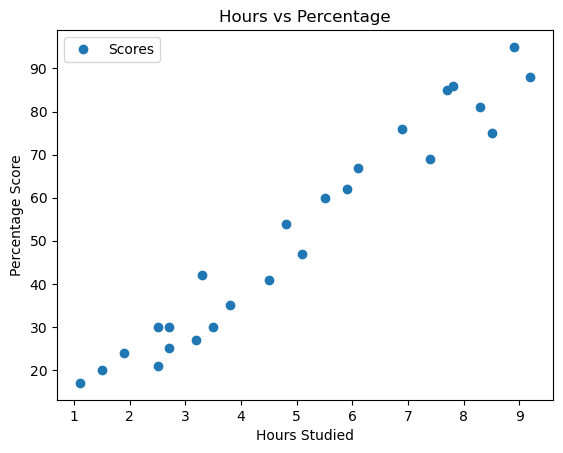

In [8]:
# Plotting the distribution of scores using Scatter Plot
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

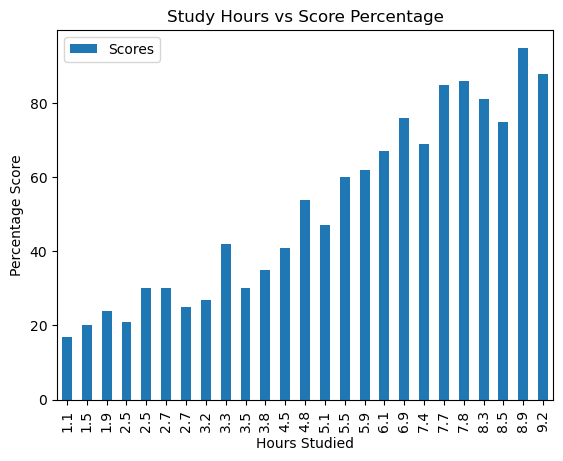

In [9]:
# Plotting the distribution of scores using Bar plot 
data_sorted = s_data.sort_values (by= 'Hours')

# Create a bar plot 
data_sorted.plot.bar(x='Hours', y='Scores') 
plt.title('Study Hours vs Score Percentage')
plt.xlabel('Hours Studied')
plt.ylabel ('Percentage Score') 
plt.show () 

**From the graph above, It can be clearly inferred that there is a positive linear relation between the number of hours studied and percentage of score.**

#### **Preparing the Data**<br>
Independent variable (attribute/input): Hours studied || Dependent variable (label/output): Score percentage<br>

In [10]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

#### **Split Data**<br>
Now that we have our attributes and labels, the next step is to split this data into training and test sets. This is achieved by using Scikit-Learn's built-in train_test_split() method:-

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### **Training the Algorithm**<br>
Now that the data is split into training and testing sets. Next step is to train the algorithm.

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


#### **Testing the Data**

In [14]:
print (X_test) # Testing data - In Hours 
y_pred = regressor.predict (X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
print (mean_squared_error (y_test, y_pred, squared=False))

4.6474476121003665


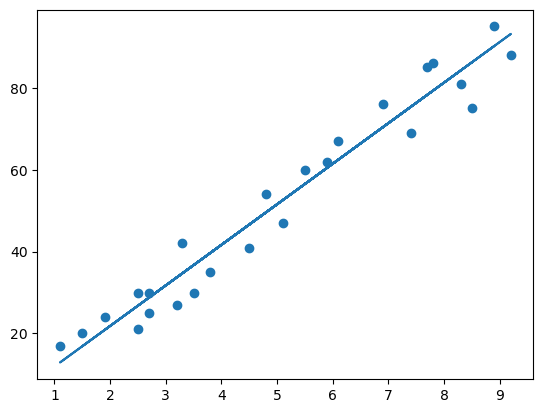

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### **Making Prediction**<br>
Now that the algorithm has been trained, Next step is to make prediction.

In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Scores')

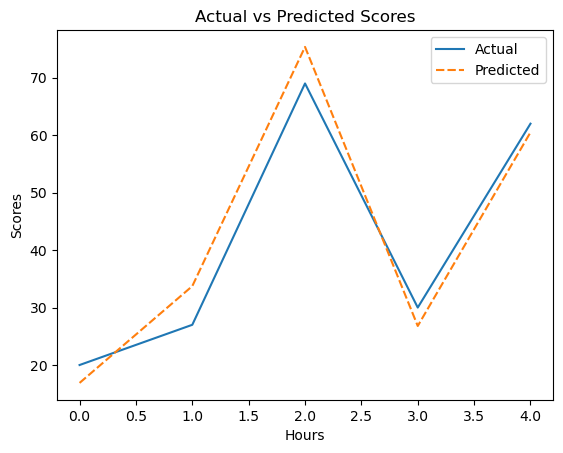

In [35]:
sns.lineplot(data = df)
plt.title ("Actual vs Predicted Scores")
plt.xlabel("Hours") 
plt.ylabel("Scores")

In [22]:
# predicitng the score based on hours
score = regressor.predict([[9.25]]) # put the hours value in the array
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(score))

No. of Hours = 9.25
Predicted Score = [93.69173249]


**That means if a student studies 9.25 hours per day he/she will get approx. 93% marks.**
<br>

#### **Evaluting the Model**<br>
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity, the mean square error is chosen. There are many such metrics.

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
